<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller: Reconocimiento facial con K-medias y K-medoides

En este caso-taller vamos a aplicar K-medias y K-medoides para agrupar rostros de indiviudos. Utilizaremos la base de datos conocida como Caras Olivetti. Esta base contiene diez imágenes diferentes de  40 personas distintas. Para algunas personas, las imágenes se tomaron en diferentes momentos, variando la iluminación, las expresiones faciales (ojos abiertos/cerrados, sonriendo/sin sonreír) y los detalles faciales (gafas/sin gafas). Todas las imágenes fueron tomadas contra un fondo homogéneo oscuro con los sujetos en una posición frontal erguida (con tolerancia a algún movimiento lateral). Esta base viene incluida dentro de la libraría `scikit-learn` y fueron provistas por T&T Laboratories Cambridge para que la comunidad académica la utilice para la evaluación de modelos predictivos. 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

Los datos pueden ser bajados directamente utilizando la librería `scikit-learn`,  la función que le permite hacer esto es `fetch_olivetti_faces`. 

In [2]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
import os

In [3]:
# Utilice este espacio para escribir el código.

data = fetch_olivetti_faces()
print("Keys:", data.keys()) # display keys

# Array con imágenes
images = data.images
# Array con etiquetas
target = data.target
# Array con nombres
Descr = data.DESCR

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\JD_01\scikit_learn_data
Keys: dict_keys(['data', 'images', 'target', 'DESCR'])


Procedimiento
1. Importamos las librerias a utilizar.
2. Traemos los datos con el comando fetch de la libreria SKlearn y los guardamos como un arreglo de tres dimensiones con una matriz de valores que representan cada pixel en escala de gris para cada una de las 400 imágenes.

### 2.  Análisis preliminar 

#### 2.1. Describa los contenidos de la base de datos, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

Dimensiones del array de imágenes 3
Longitud en las dimensiones del array de imágenes (400, 64, 64)
Valores de descripción de intensidad luminica estandarizada, valor minimo 0.0 , valor maximo 1.0 y valor promedio 0.5470426
De acuerdo con la información contenida en targets, tenemos  40  individuos representados en las imágenes
Dimensiones de una sola imagen 64 x 64


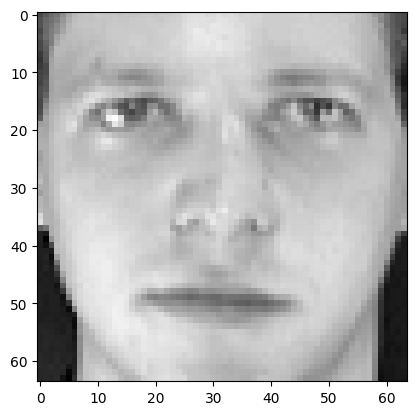

In [4]:
# Utilice este espacio para escribir el código.
# Dimensiones del array de imagenes:
print("Dimensiones del array de imágenes",images.ndim)
print("Longitud en las dimensiones del array de imágenes",images.shape)
print("Valores de descripción de intensidad luminica estandarizada, valor minimo",np.min(images), ", valor maximo",np.max(images),"y valor promedio",np.average(images))

print("De acuerdo con la información contenida en targets, tenemos ",len(np.unique(target))," individuos representados en las imágenes")


# Extraemos una sola imagen para mostrarla en la descripción
image = images[0,:]
# Dimensiones de una sola imagen
n,k= image.shape
print("Dimensiones de una sola imagen", n, "x", k)

# Se grafica la imagen de muestra 
plt.imshow(image, cmap='gray')

Procedimiento
1. Encontramos las medidas del set de datos completo de las imagénes usando los comandos dim y shape sobre el array.
2. Se verifican valores extremos de los números en las matrices de imagen con funciones min, max y promedio.
3. Se extrae una imagen de muestra, se miden sus dimensiones y se presenta como ejemplo.

Análisis y conclusiones
1. Se identifica que el set de datos cuenta con 400 imágenes de 40 individuos (10 imágenes por individuo). 
2. Cada imagen tiene una dimensión de 64x64 pixeles.
3. Los valores en escala de grises que representan cada imagen se encuentran en el rango 0 - 1 .




#### 2.2. Genere una figura con una imágen de cada uno de los individuos

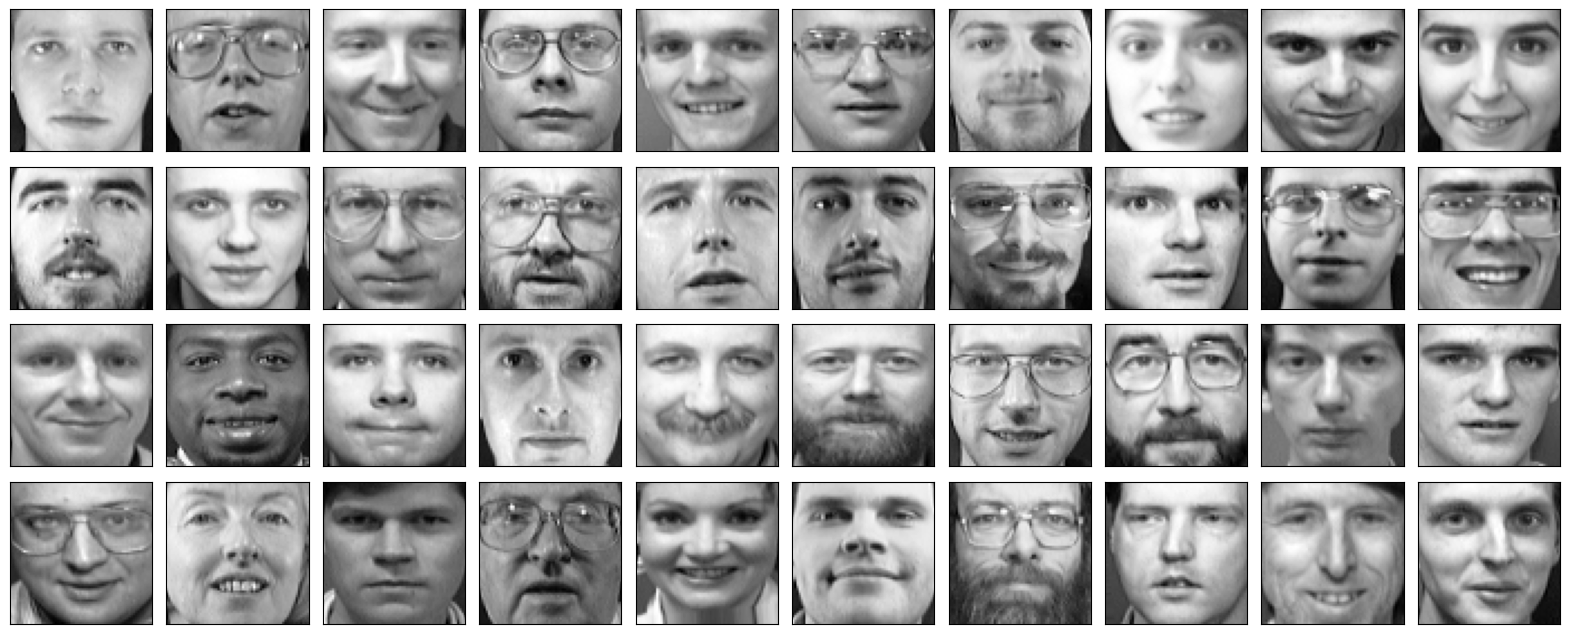

In [5]:
# Obtener las imágenes y etiquetas
X_faces = data.data
y_faces = data.target

# Crear una figura con una cuadrícula de imágenes
fig, axes = plt.subplots(4, 10, figsize=(20, 8),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_faces[i*10].reshape(64, 64), cmap='gray')
    #ax.set_title(f'Persona {y_faces[i*10]}')

plt.show()


Procedimiento
1. Generamos un objeto subplot de acuerdo con las dimensiones del número de individuos, que en este caso son 40 (4 filas x 10 columnas).  
2. Agregamos las imágenes al subplot tomando 1 de cada 10 imágenes, pues habiamos visto que las imágenes de cada individuo son consecutivas, de manera que se agrega la imagen i*10, donde i es el iesimo individuo. 

Análisis y conclusiones
1. Se identifica el rostro de 40 individuos distintos, con caracteristicas visuales diferentes, algunos tienen barba, gafas, son de alguna etnicidad diferente o de un género distinto. 



#### 2.3. Transforme las imágenes en un data frame donde cada columna contiene los valores estandarizados del nivel de gris en la imagen y una columna con la etiqueta de cada imagen. 

In [6]:
# Estandarizar los valores de píxeles en las imágenes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_faces_scaled = scaler.fit_transform(X_faces)

# Crear un DataFrame con los valores estandarizados y las etiquetas
columns = [f'pixel_{i}' for i in range(X_faces_scaled.shape[1])]
df = pd.DataFrame(X_faces_scaled, columns=columns)
df['etiqueta'] = y_faces

df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,etiqueta
0,-0.499903,-0.351181,-0.302961,-0.395361,-0.137608,0.104953,0.213296,0.194895,0.171393,0.065267,...,1.663787,1.598077,1.621725,0.726428,-1.092090,-0.959562,-0.898275,-0.831520,-0.850457,0
1,0.301499,0.194640,0.185686,0.203914,0.213404,0.290404,0.361849,0.355027,0.311534,0.180529,...,-1.157252,-1.249632,-1.096954,-1.007794,-0.982782,-0.938375,-0.898275,-0.876585,-0.873362,0
2,-0.454109,-0.176519,0.079458,0.054095,0.169528,0.383129,0.361849,0.248272,0.255478,0.151713,...,-1.293754,-0.999033,-1.162729,-1.141196,-1.004644,-0.980749,-0.964354,-0.899118,-0.873362,0
3,-1.118128,-1.268161,-1.450221,-1.679522,-1.936544,-2.236356,-2.262576,-1.566562,-1.230019,-1.116164,...,1.481785,1.620859,1.753274,2.082678,2.143408,2.197309,2.295495,2.390682,2.379127,0
4,0.553368,0.587631,0.546860,0.546357,0.498601,0.568579,0.436125,0.435093,0.395618,0.382236,...,-1.134501,-1.021815,-0.965405,-0.874393,-0.851614,-0.811252,-0.766119,-0.763921,-0.758838,0


Procedimiento
1. Usando la funcion StandardScaler de SKlearn, estandarizamos los valores, centrandolos alrededor de cero (media=0, desviación estándar =1)  
de modo similar a generar un "z-score".

2. Procedemos a ubicar los datos en un dataframe donde cada fila corresponde a la imagen un individuo y cada uno de los elementos de las columnas es un pixel de la imagen que queremos representar.

Análisis y conclusiones

1. Al estandarizar las imágenes, estamos manteniendo la varianza interna de los datos, solo la estamos reescalando para tener los datos centrados alrededor de cero y con una desviación estandar de 1.

2. La estructura de datos de dataframe facilita la manipulación de los datos al permitirnos usar funciones de pandas.   



### 3. Clasificando de forma no supervisada

En esta sección trataremos de clasificar las imágenes de los individuos de forma no supervisada. Para ello utilizaremos los algoritmos de k-medias y k-medoides. Dado que sabemos que el dataset consta de 40 personas diferentes, utilizaremos esta información para pedirle a los algoritmos que encuentren k=40 clusters y examinaremos su precisión.


#### 3.1. Implemente k-medias sobre los datos estandarizados en el punto anterior. Al implementar utilice  `random_state=123` y `n_init=10`. (Esto puede tomar mucho tiempo y requerir mucho RAM, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [7]:
# Utilice este espacio para escribir el código.
from sklearn.cluster import KMeans
df_cluster = df.drop(columns=['etiqueta'])

In [ ]:
kmeans_40 = KMeans(n_clusters = 40, random_state = 123, n_init=10)
kmeans_40.fit(df_cluster)

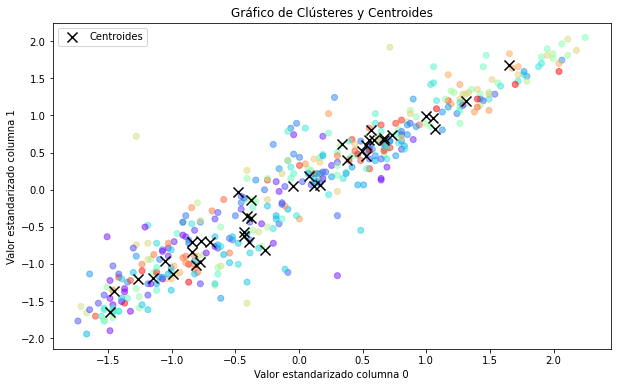

In [40]:
# Obtener las etiquetas de los clústeres y los centroides
cluster_labels = kmeans_40.labels_
cluster_centers = kmeans_40.cluster_centers_

# Graficar los centroides de los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(df_cluster.iloc[:, 0], df_cluster.iloc[:, 1], c=cluster_labels, cmap='rainbow', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Centroides')
plt.title('Gráfico de Clústeres y Centroides')
plt.xlabel('Valor estandarizado columna 0')
plt.ylabel('Valor estandarizado columna 1')
plt.legend()
plt.show()

Procedimiento

1. De Sklearn importar Kmeans.
2. Configurar el dataframe con los datos necesarios, es decir, eliminando la columna `etiqueta`
3. Configurar el modelo con los parámetros de n_cluster y random_state de acuerdo a los lineamientos.
4. Ajustar el modelo y graficar los puntos con los centroides.

Análisis y Conclusiones
1. Se obtiene un gráfico de 40 clusteres, donde las "X" representan cada uno de los centroides.

#### 3.2. Evalúe la precisión del algoritmo para agrupar las imágenes de los individuos. 

In [48]:
# Utilice este espacio para escribir el código.

from sklearn.metrics import silhouette_score


varianza_intra_cluster = []
silhouettes = []
Y = {}  # Diccionario para almacenar asignaciones de clústeres

for k in range(1, 41):
    kmeans = KMeans(n_clusters=k, random_state=123, n_init=10).fit(df_cluster)
    varianza_intra_cluster.append(kmeans.inertia_)
    
    try:
        silhouette = silhouette_score(df_cluster, kmeans.labels_)
    except:
        silhouette = 0
        
    silhouettes.append(silhouette)
    Y[k] = kmeans.labels_

# Imprimir los resultados para k=40
k = 40
print(f"Clusters: {k}, Inercia: {varianza_intra_cluster[k-1]}, Silhouette: {silhouettes[k-1]}")

c:\Users\Felipe\anaconda3\envs\Financiero\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Felipe\anaconda3\envs\Financiero\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Felipe\anaconda3\envs\Financiero\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Felipe\anaconda3\envs\Financiero\lib\site-packages\sklearn\cluster\_kmeans.p

Clusters: 40, Inercia: 605002.5625, Silhouette: 0.15659981966018677


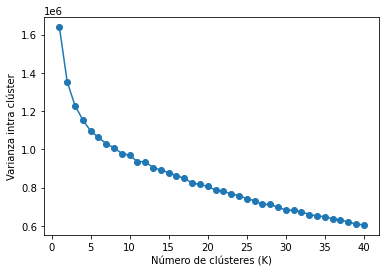

In [49]:
plt.plot(range(1, 41), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

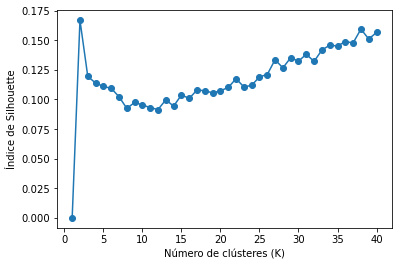

In [50]:
plt.plot(range(1, 41), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

Procedimiento
1. Importar silhouette_score de la librearía de Sklearn.
2. Inicializar dos listas, una para almacenar la varianza intra cluster, y otra para guardar los coeficientes de Silhouette.
3. Iterar por cada uno de los cluster, es decir, desde el cluster 1 hasta el 40, para calcular la varianza intra cluster y el coeficiente de Silhouette.
4. Graficar las dos listas para analizar.

Análisis y Conclusiones
1. Para el método de intra cluster se puede usar el método del codo y así determinar visualmente que el número óptimo de clusteres oscila entre 4 o 5.
2. En cuanto al coeficiente de Silhouette se puede determinar que el máximo se obtiene con k=2.

#### 3.3. Usando PCA reduzca la dimensión de la matriz de predictores. Retenga el numero de componentes que explican el 95% de la varianza y vuelva a utilizar k-medias para clasificar las imágenes comentado si la precisión mejoró. 

In [17]:
# Utilice este espacio para escribir el código.
from scipy.linalg import svd
U, S, VT = svd(df_cluster)
S

array([6.63583862e+02, 4.49686249e+02, 3.58432251e+02, 2.77160400e+02,
       2.30620850e+02, 2.25395477e+02, 1.97627625e+02, 1.84236465e+02,
       1.74468475e+02, 1.64229813e+02, 1.58541870e+02, 1.48925507e+02,
       1.42164352e+02, 1.36901382e+02, 1.33903610e+02, 1.25295441e+02,
       1.19181389e+02, 1.14014107e+02, 1.11537079e+02, 1.08552528e+02,
       1.05064407e+02, 1.03261841e+02, 9.86695480e+01, 9.52532654e+01,
       9.38152390e+01, 9.16828461e+01, 9.01866760e+01, 8.80271530e+01,
       8.30530014e+01, 8.21064072e+01, 8.03602066e+01, 7.78878250e+01,
       7.72803574e+01, 7.40537567e+01, 7.33799744e+01, 7.22696991e+01,
       7.10480042e+01, 6.90244141e+01, 6.83161469e+01, 6.62256546e+01,
       6.54045181e+01, 6.42853317e+01, 6.35916405e+01, 6.33862572e+01,
       6.17917557e+01, 6.15446892e+01, 6.03976402e+01, 6.00850639e+01,
       5.83513451e+01, 5.80856209e+01, 5.76158943e+01, 5.65413818e+01,
       5.57883492e+01, 5.50624542e+01, 5.42818565e+01, 5.33260956e+01,
      

In [28]:
var_explained = np.round(S**2/np.sum(S**2), decimals=6)
sum(var_explained[0:123])

0.9505309942178428

In [34]:
def svd_truncada(l, X):
    """
     Esta función retorna la aproximación a la matriz original a partir de la SVD truncada

    Parameters:
        l (int):  número de valores singulares a utilizar en la reconstrucción
        X (array): matriz original a descomponer

    Returns:
        resultado (array): reconstrucción de X con l componentes principales
    """
    # SVD 
    U,S,Vt = svd(df_cluster)

    
    S2= np.resize(S,[l,1])*np.eye(l,l) #ponemos los valores singulares en una matriz diagonal
    
    # SVD truncada
    return(np.dot(U[:,0:l],np.dot(S2,Vt[0:l,:])))

In [38]:
df_cluster_reduc = pd.DataFrame(svd_truncada(60, df_cluster))

In [39]:
kmeans_40_reduc = KMeans(n_clusters = 40, random_state = 123, n_init=10)
kmeans_40_reduc.fit(df_cluster_reduc)

KMeans(n_clusters=40, n_init=10, random_state=123)

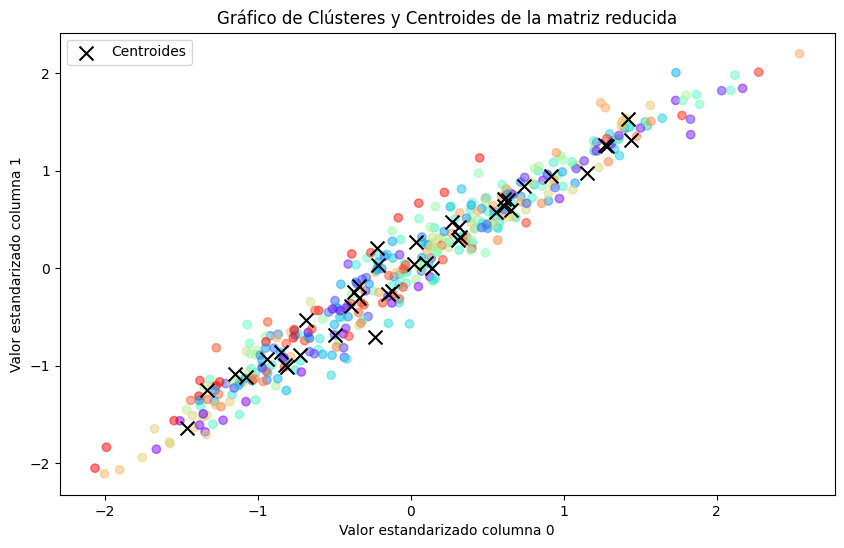

In [40]:
# Obtener las etiquetas de los clústeres y los centroides
cluster_labels_reduc = kmeans_40_reduc.labels_
cluster_centers_reduc = kmeans_40_reduc.cluster_centers_

# Graficar los centroides de los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(df_cluster_reduc.iloc[:, 0], df_cluster_reduc.iloc[:, 1], c=cluster_labels_reduc, cmap='rainbow', alpha=0.5)
plt.scatter(cluster_centers_reduc[:, 0], cluster_centers_reduc[:, 1], c='black', marker='x', s=100, label='Centroides')
plt.title('Gráfico de Clústeres y Centroides de la matriz reducida')
plt.xlabel('Valor estandarizado columna 0')
plt.ylabel('Valor estandarizado columna 1')
plt.legend()
plt.show()

Procedimiento

Análisis y Conclusiones
1. 123 componentes principales explican el 95% de la varianza.

#### 3.4. Utilice ahora el algoritmo por  K-medoides (use el mismo random state a los puntos anteriores), comente si mejoró la precisión total y para cada grupo de imágenes.

In [15]:
# Utilice este espacio para escribir el código.
from sklearn_extra.cluster import KMedoids 

Kmedoides = KMedoids(n_clusters = 40, random_state = 123).fit(df_cluster)
Kmedoides.medoid_indices_

array([242, 201, 258, 251, 293, 206, 149, 148, 204, 376, 146, 120, 248,
       399, 246, 124, 286, 396, 244, 110,  45, 236, 205, 127, 380,  33,
       363, 182,  41, 302,  82, 322, 291, 222,  83, 240, 143, 225,  28,
       171], dtype=int64)

Procedimiento

Análisis y Conclusiones

### 4. Número de clusters óptimo

En el punto anteriores utilizamos nuestro conocimiento previo sobre los datos para elegir el número de clusters. En este punto, verifique si 40 es realmente el número de cluster que usted elegiría según los criterios estudiados en los cuadernos teóricos. Discuta los resultados obtenidos.

In [28]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)